# Stock Market Prediction And Forecasting Using Stacked LSTM

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

## Importing dataset and viewing it

In [2]:
dataset = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
#Checking shape of loaded dataset 
print("Shape of Dataset:\n Numer of Rows- ",dataset.shape[0],"\n Number of Columns- ",dataset.shape[1])

Shape of Dataset:
 Numer of Rows-  2035 
 Number of Columns-  8


In [4]:
#Checking attributes 
print("Column names: ",dataset.columns.values)

Column names:  ['Date' 'Open' 'High' 'Low' 'Last' 'Close' 'Total Trade Quantity'
 'Turnover (Lacs)']


In [5]:
#Checking for null values
print("Number of null values:\n" , dataset.isna().sum())

Number of null values:
 Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [6]:
#Describing the dataset
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


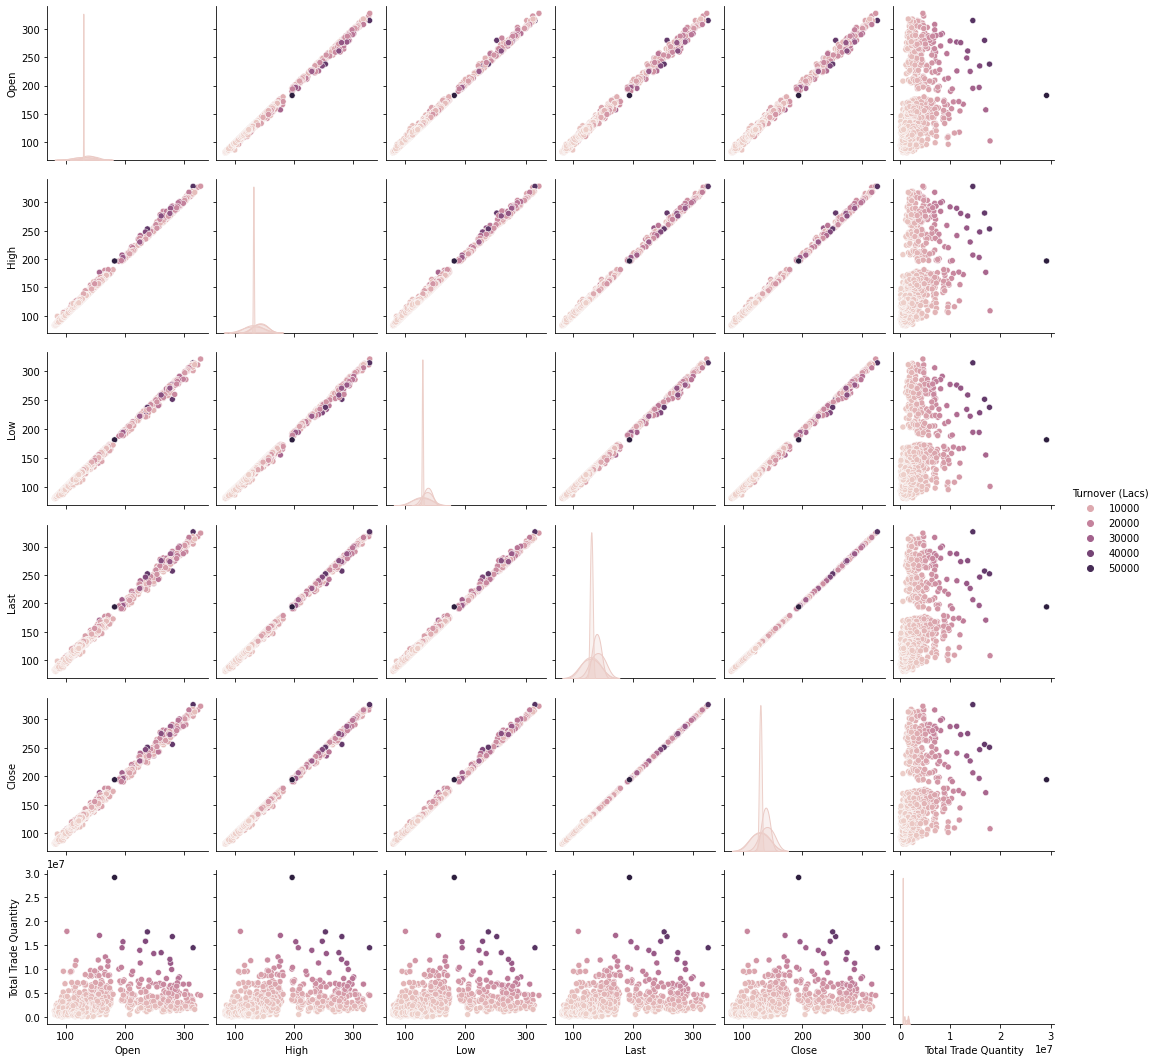

In [8]:
sns.pairplot(dataset,hue='Turnover (Lacs)')

## Indexing the dataset as per date and then plotting

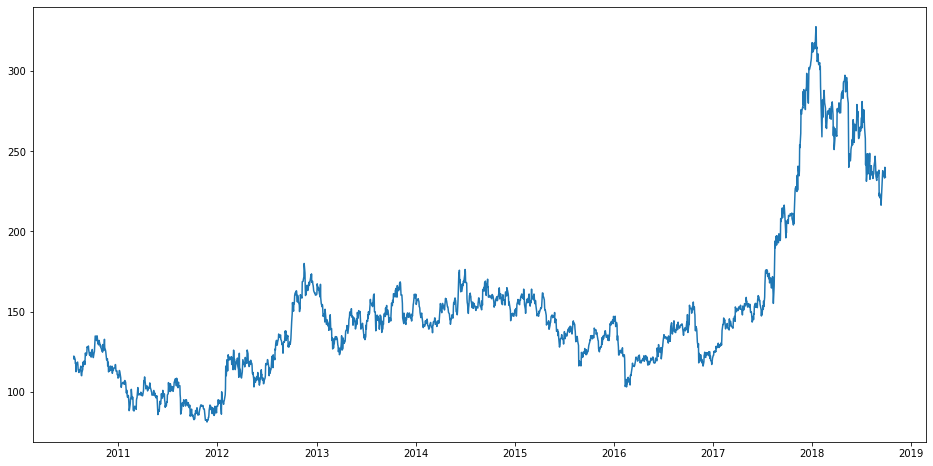

In [9]:
#setting index as date
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['Date']
dataset = dataset.sort_index(ascending=True, axis=0)

#plot
plt.figure(figsize=(16,8))
plt.plot(dataset['Open'], label='Open Price history')

In [10]:
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


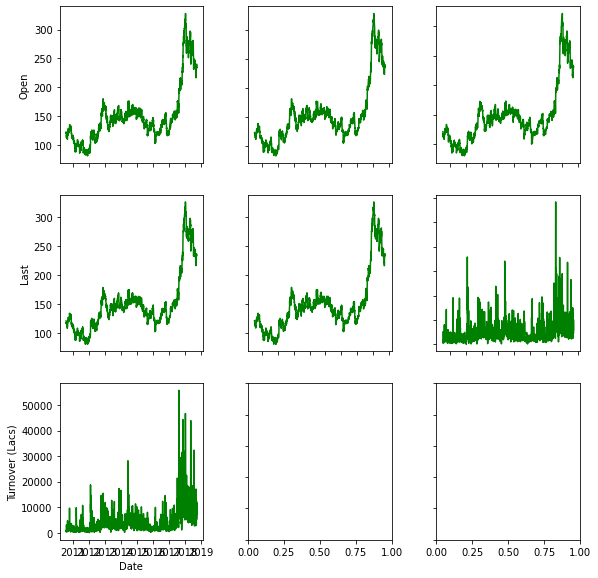

In [11]:
x=list(dataset.columns.values[1:]) #Selecting all columns except Date column
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.tight_layout()
a=-1
for i,j in enumerate(x):
    if i%3==0:
        a=a+1
    axs[a, i%3].plot_date(dataset.Date,dataset[[j]],'g')
a=0
for ax in axs.flat:
    if a<7:
        ax.set(xlabel='Date', ylabel=x[a])
    a=a+1
for ax in axs.flat:
    ax.label_outer()
plt.show()

## Extracting only useful data

In [13]:
new_data = pd.DataFrame(index=range(0,len(dataset)),columns=['Date', 'Open'])
for i in range(0,len(dataset)):
    new_data['Date'][i] = dataset['Date'][i]
    new_data['Open'][i] = dataset['Open'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [14]:
new_data

,Open
Date,
2010-07-21,122.1
2010-07-22,120.3
2010-07-23,121.8
2010-07-26,120.1
2010-07-27,117.6
...,...
2018-09-24,233.55
2018-09-25,233.3
2018-09-26,240.0


## Creating train and test sets

In [15]:
dataset = new_data.values

train = dataset[0:int(dataset.shape[0]*0.6),:]
test = dataset[int(dataset.shape[0]*0.6):,:]

In [16]:
train.shape

(1221, 1)

## converting dataset into x_train and y_train and adding time step of 60

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))



## Model creation for LSTM network

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


1161/1161 - 35s - loss: 7.0150e-04 - 35s/epoch - 30ms/step


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [23]:
inputs

array([[0.29460665],
       [0.27858881],
       [0.26865369],
       [0.27128954],
       [0.2714923 ],
       [0.27311436],
       [0.2676399 ],
       [0.28041363],
       [0.27453366],
       [0.28730738],
       [0.2891322 ],
       [0.28669911],
       [0.28892944],
       [0.29034874],
       [0.32664234],
       [0.32583131],
       [0.31549067],
       [0.31690998],
       [0.30900243],
       [0.29115977],
       [0.28304947],
       [0.28345499],
       [0.28203569],
       [0.26987024],
       [0.24533658],
       [0.24797242],
       [0.24797242],
       [0.25263585],
       [0.25446067],
       [0.25608273],
       [0.23479319],
       [0.23479319],
       [0.24452555],
       [0.25223033],
       [0.25162206],
       [0.25932685],
       [0.26662612],
       [0.27027575],
       [0.27047851],
       [0.26905921],
       [0.26378751],
       [0.26723439],
       [0.26926196],
       [0.26642336],
       [0.26885645],
       [0.27696675],
       [0.25121655],
       [0.260

In [24]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
open_price = model.predict(X_test)
open_price = scaler.inverse_transform(open_price)

26/26 [==============================] - 1s 18ms/step


In [25]:
train = new_data[:int(new_data.shape[0]*0.6)]
test = new_data[int(new_data.shape[0]*0.6):]
test['Predictions'] = open_price
test

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\3225344504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = open_price


,Open,Predictions
Date,,
2015-06-18,132.95,134.337143
2015-06-19,133.2,134.023651
2015-06-22,133.75,134.407639
2015-06-23,135.6,135.180664
2015-06-24,133.35,136.367966
...,...,...
2018-09-24,233.55,240.035324
2018-09-25,233.3,240.941910
2018-09-26,240.0,240.734421


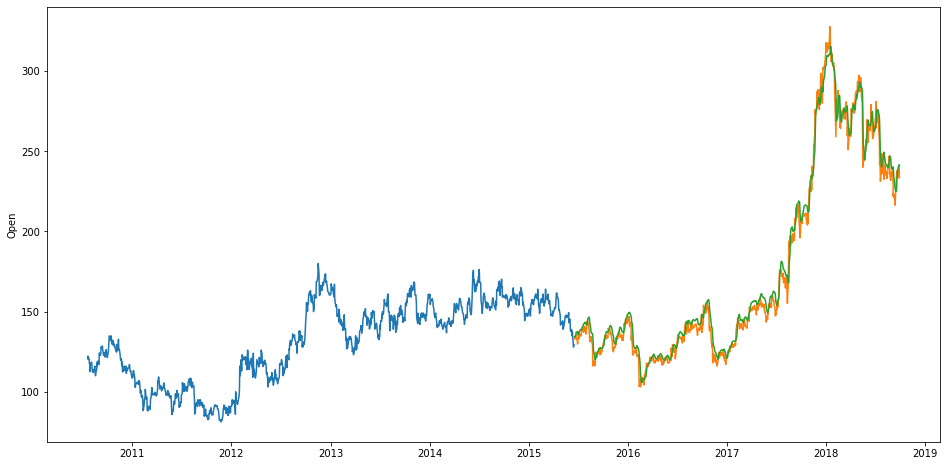

In [26]:
plt.figure(figsize=(16,8))
plt.ylabel("Open")
plt.plot(train['Open'])
plt.plot(test[['Open','Predictions']])

## Prediction in green, actual data in orange and previous data in blue